** MSFT_ANALSIS **

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

* Here, importing the Microsoft's financial statements that includes : Income statement, Cash flow statement and Balance sheet

In [2]:
msft_income=pd.read_csv(r'R:\Project\MSFT\msft_income.csv')
msft_cashflow=pd.read_csv(r'R:\Project\MSFT\msft_cashflow.csv')
msft_balance=pd.read_csv(r'R:\Project\MSFT\msft_balance.csv')

In [3]:
msft_income.head()

,field_name,2020-06-30,2019-06-30,2018-06-30,2017-06-30,2016-06-30,2015-06-30,2014-06-30,2013-06-30,2012-06-30,2011-06-30,2010-06-30,2009-06-30,2008-06-30,2007-06-30,2006-06-30,2005-06-30
0,Revenue,143015.0,125843.0,110360.0,96571.0,91154.0,93580.0,86833.0,77849.0,73723.0,69943.0,62484.0,58437.0,60420.0,51122.0,44282.0,39788.0
1,Cost Of Goods Sold,46078.0,42910.0,38353.0,34261.0,32780.0,33038.0,27078.0,20385.0,17530.0,15577.0,12395.0,12155.0,11598.0,10693.0,7650.0,6031.0
2,Gross Profit,96937.0,82933.0,72007.0,62310.0,58374.0,60542.0,59755.0,57464.0,56193.0,54366.0,50089.0,46282.0,48822.0,40429.0,36632.0,33757.0
3,Research And Development Expenses,19269.0,16876.0,14726.0,13037.0,11988.0,12046.0,11381.0,10411.0,9811.0,9043.0,8714.0,9010.0,8164.0,7121.0,6584.0,6097.0
4,SG&A Expenses,24709.0,23098.0,22223.0,19942.0,19198.0,20324.0,20488.0,20289.0,18426.0,18162.0,17277.0,16909.0,18387.0,14870.0,13576.0,13099.0


  * As shwon in above dataframe, timesteps are used as header as data was obtained from web scraping. Transposing all the financial statements, and reindexing will help to set the years in ascending order and match the index for concating.

In [4]:
msft_cashflow1=msft_cashflow.set_index('field_name').T
msft_cashflow1=msft_cashflow1.reindex(index=msft_cashflow1.index[::-1])
msft_income1=msft_income.set_index('field_name').T
msft_income1=msft_income1.reindex(index=msft_income1.index[::-1])
msft_balance1=msft_balance.set_index('field_name').T
msft_balance1=msft_balance1.reindex(index=msft_balance1.index[::-1])

In [5]:
msft_cashflow1.head()

field_name,Net Income/Loss,Total Depreciation And Amortization - Cash Flow,Other Non-Cash Items,Total Non-Cash Items,Change In Accounts Receivable,Change In Inventories,Change In Accounts Payable,Change In Assets/Liabilities,Total Change In Assets/Liabilities,Cash Flow From Operating Activities,...,Net Current Debt,Debt Issuance/Retirement Net - Total,Net Common Equity Issued/Repurchased,Net Total Equity Issued/Repurchased,Total Common And Preferred Stock Dividends Paid,Financial Activities - Other,Cash Flow From Financial Activities,Net Cash Flow,Stock-Based Compensation,Common Stock Dividends Paid
2005-06-30,12254.0,855.0,874.0,1729.0,-1243.0,NaN,NaN,1417.0,174.0,16605.0,...,NaN,NaN,-4948.0,-4948.0,-36112.0,-18.0,-41078.0,-9453.0,2448.0,-36112.0
2006-06-30,12599.0,903.0,3299.0,4202.0,-2071.0,NaN,NaN,-326.0,-2397.0,14404.0,...,NaN,NaN,-17106.0,-17106.0,-3545.0,89.0,-20562.0,1863.0,1715.0,-3545.0
2007-06-30,14065.0,1440.0,3252.0,4692.0,-1764.0,NaN,NaN,803.0,-961.0,17796.0,...,NaN,NaN,-20793.0,-20793.0,-3805.0,54.0,-24544.0,-603.0,1550.0,-3805.0
2008-06-30,17681.0,2056.0,4310.0,6366.0,-1569.0,NaN,NaN,-866.0,-2435.0,21612.0,...,NaN,NaN,-9039.0,-9039.0,-4015.0,120.0,-12934.0,4228.0,1479.0,-4015.0
2009-06-30,14569.0,2562.0,2084.0,4646.0,2215.0,255.0,-671.0,-1977.0,-178.0,19037.0,...,1178.0,5746.0,-8774.0,-8774.0,-4468.0,33.0,-7463.0,-4263.0,1708.0,-4468.0


In [6]:
new_msft=pd.concat([msft_cashflow1,msft_income1,msft_balance1], axis=1)
new_msft.head()

field_name,Net Income/Loss,Total Depreciation And Amortization - Cash Flow,Other Non-Cash Items,Total Non-Cash Items,Change In Accounts Receivable,Change In Inventories,Change In Accounts Payable,Change In Assets/Liabilities,Total Change In Assets/Liabilities,Cash Flow From Operating Activities,...,Long Term Debt,Other Non-Current Liabilities,Total Long Term Liabilities,Total Liabilities,Common Stock Net,Retained Earnings (Accumulated Deficit),Comprehensive Income,Other Share Holders Equity,Share Holder Equity,Total Liabilities And Share Holders Equity
2005-06-30,12254.0,855.0,874.0,1729.0,-1243.0,NaN,NaN,1417.0,174.0,16605.0,...,NaN,4158.0,5823.0,22700.0,60413.0,-12298.0,NaN,NaN,48115.0,70815.0
2006-06-30,12599.0,903.0,3299.0,4202.0,-2071.0,NaN,NaN,-326.0,-2397.0,14404.0,...,NaN,5287.0,7051.0,29493.0,59005.0,-18901.0,NaN,NaN,40104.0,69597.0
2007-06-30,14065.0,1440.0,3252.0,4692.0,-1764.0,NaN,NaN,803.0,-961.0,17796.0,...,NaN,6453.0,8320.0,32074.0,60557.0,-29460.0,NaN,NaN,31097.0,63171.0
2008-06-30,17681.0,2056.0,4310.0,6366.0,-1569.0,NaN,NaN,-866.0,-2435.0,21612.0,...,NaN,4721.0,6621.0,36507.0,62849.0,-26563.0,NaN,NaN,36286.0,72793.0
2009-06-30,14569.0,2562.0,2084.0,4646.0,2215.0,255.0,-671.0,-1977.0,-178.0,19037.0,...,3746.0,6269.0,11296.0,38330.0,62382.0,-22824.0,NaN,NaN,39558.0,77888.0


 ## Data cleaning ##

* Checking the data for Null values.

In [7]:
msft_null=new_msft.isnull().sum()
msft_null

field_name
Net Income/Loss                                     0
Total Depreciation And Amortization - Cash Flow     0
Other Non-Cash Items                                0
Total Non-Cash Items                                0
Change In Accounts Receivable                       0
                                                   ..
Retained Earnings (Accumulated Deficit)             0
Comprehensive Income                                7
Other Share Holders Equity                         16
Share Holder Equity                                 0
Total Liabilities And Share Holders Equity          0
Length: 74, dtype: int64

* Some of the columns are missing all the data. Dropna() function with how='all' will select columns where all the values are null and drop those columns. 

* Also,lets, create list of columns for quick reference. 

In [8]:
new_msft=new_msft.dropna(axis=1, how='all')
msft_columns=new_msft.columns.to_list()
msft_columns1=new_msft.columns.to_list()

* This is one of the interesing method to fill in the missing values in data frame. We can import the simple imputer from SkLearn and fill the missing values using, mean, median and mode in Strategy. For this, data I decided to use mean as it make more sense. There is,also, advace method called Iterative Imputer. 

In [9]:
imputer= SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(new_msft)
final_msft=pd.DataFrame(imputer.transform(new_msft), index=new_msft.index, columns=new_msft.columns)

## Analysis ## 

* Let's create one more dataframe 'msft_per' to store important ratios and data for easy access.
* Here, are some interesting facts and results of company's financial health.
* Every sector has different ratios. It is helpful to compare companies in same sector and see the differences. It helps to make sound    
  investment deciosin. That is why it is called numbers speak. 

 ** Profitability indicators **

    Return on Asset= ROA,
    Retrun on Equity = ROE,
    Return on capital employed = ROCE

In [14]:
msft_per=pd.DataFrame((final_msft['Net Income']/final_msft['Total Assets'])*100,columns=['msft_roa'])
msft_per['msft_roe']=(final_msft['Net Income']/final_msft['Share Holder Equity'])*100
msft_per['msft_roce']=(final_msft['Net Income']/(final_msft['Share Holder Equity']+final_msft['Total Current Liabilities']))*100

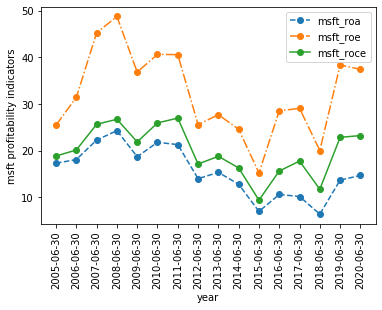

In [15]:
fig,ax=plt.subplots()
ax.plot(msft_per.index, msft_per.msft_roa, marker="o",linestyle='--',label="msft_roa")
ax.plot(msft_per.index, msft_per.msft_roe, marker="o",linestyle='-.',label="msft_roe")
ax.plot(msft_per.index, msft_per.msft_roce, marker="o",label='msft_roce')
plt.xticks(rotation=90)
ax.set_xlabel("year")
ax.set_ylabel("msft profitability indicators")
leg = ax.legend()
plt.show()

* Earning per share and percetage increase in EPS from previous year
* Plotting EPS on one axis and yearly change helps to realize profitability over the years.

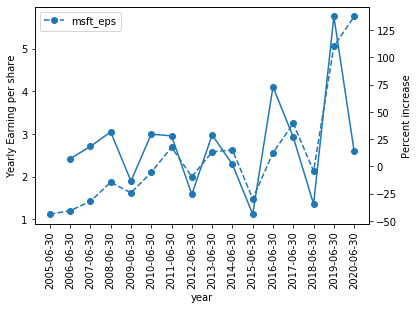

In [29]:
msft_per['msft_eps']=final_msft['EPS - Earnings Per Share']
fig,ax=plt.subplots()
ax.plot(msft_per.index, msft_per.msft_eps, marker="o",linestyle='--',label="msft_eps")
plt.xticks(rotation=90)
ax2=ax.twinx()
ax2.plot(msft_per.msft_eps.pct_change()*100, marker='o',label="Percent increase")
ax.set_xlabel("year")
ax.set_ylabel("Yearly Earning per share")
ax2.set_ylabel("Percent increase")
leg = ax.legend()
plt.show()

* Over the years revenue and net income has increased which is healthy indication that company is progressing well. 

In [16]:
msft_per['msft_rev']=final_msft['Revenue']
msft_per['msft_net_income']=final_msft['Net Income/Loss']
msft_per['msft_profit_margin']=((msft_per['msft_net_income']/msft_per['msft_rev'])*100)

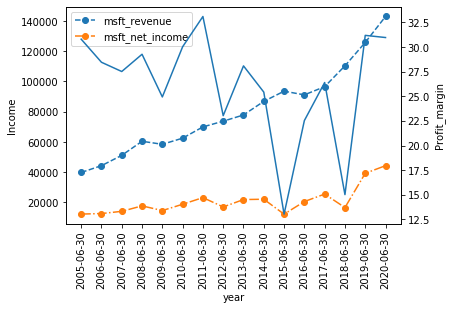

In [17]:
fig,ax=plt.subplots()
ax.plot(msft_per.index, msft_per.msft_rev, marker="o",linestyle='--',label="msft_revenue")
ax.plot(msft_per.index, msft_per.msft_net_income, marker="o",linestyle='-.',label="msft_net_income")
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(msft_per.msft_profit_margin)
ax.set_xlabel("year")
ax.set_ylabel("Income")
ax2.set_ylabel("Profit_margin")
leg = ax.legend()
plt.show()

 ** Debt Ratios **

     Debt ratio,
     Debt- Equity ratio - DE Ratio ( Total Liabilities),
     Long term Debt Equity ratio - Long term DE Ratio ( Only long term debt)

In [18]:
msft_per['msft_DebtRatio']=(final_msft['Total Liabilities']/final_msft['Total Assets'])
msft_per['msft_DE_Ratio']=(final_msft['Total Liabilities']/final_msft['Share Holder Equity'])
msft_per['msft_long_term_DE_Ratio']=(final_msft['Long Term Debt']/final_msft['Share Holder Equity'])

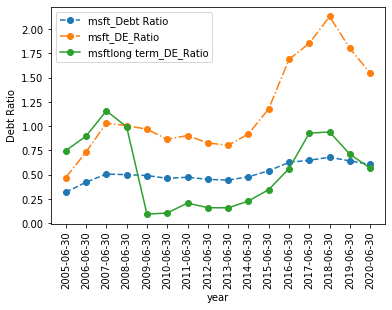

In [19]:
fig,ax=plt.subplots()
ax.plot(msft_per.index, msft_per.msft_DebtRatio, marker="o",linestyle='--',label="msft_Debt Ratio")
ax.plot(msft_per.index, msft_per.msft_DE_Ratio, marker="o",linestyle='-.',label="msft_DE_Ratio")
ax.plot(msft_per.index, msft_per.msft_long_term_DE_Ratio,marker="o",label="msftlong term_DE_Ratio")
plt.xticks(rotation=90)
ax.set_xlabel("year")
ax.set_ylabel("Debt Ratio")
leg = ax.legend()
plt.show()

** It is good to know the expenses of the company. Drastic increase or decrease in any of the expenses can be questioned.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

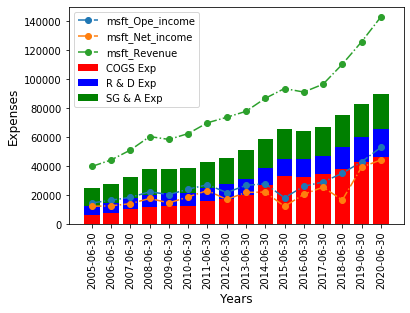

In [16]:
fig,ax=plt.subplots()
ax.plot(final_msft['Operating Income'], marker="o",linestyle='-.',label="msft_Ope_income")
ax.plot(final_msft['Net Income'], marker="o",linestyle='-.',label="msft_Net_income")
ax.plot(final_msft['Revenue'], marker="o",linestyle='-.',label="msft_Revenue")
p1=ax.bar(msft_per.index, final_msft['Cost Of Goods Sold'], color='r',label='COGS Exp')
p2=ax.bar(msft_per.index, final_msft['Research And Development Expenses'],  bottom=final_msft['Cost Of Goods Sold'], color='b',label='R & D Exp')
p3=ax.bar(msft_per.index, final_msft['SG&A Expenses'],bottom=final_msft['Cost Of Goods Sold']+final_msft['Research And Development Expenses'], color='g',label='SG & A Exp')


plt.xlabel('Years', fontsize=12)
plt.ylabel('Expenses', fontsize=12)
plt.legend(handles=[p1,p2,p3])
leg = ax.legend()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

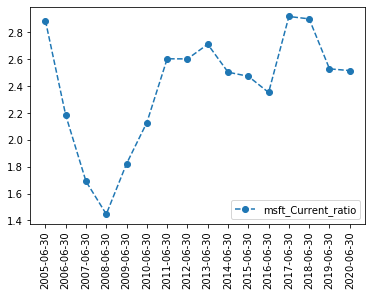

In [21]:
msft_per['msft_current_ratio']=final_msft['Total Current Assets']/final_msft['Total Current Liabilities']
fig,ax=plt.subplots()
ax.plot(msft_per['msft_current_ratio'], marker="o",linestyle='--',label="msft_Current_ratio")
leg=ax.legend()
plt.xticks(rotation=90)

** Cashflow ratio **

    Operating cashflow/ Rev =  OCF/Rev,
    Free cash flow/ Operating cash flow = FCF/ OCF

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

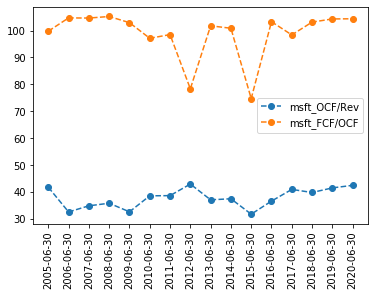

In [22]:
msft_per['OCF/Rev']=((final_msft['Cash Flow From Operating Activities']/final_msft['Revenue'])*100)
msft_per['FCF/OCF']=(((final_msft['Cash Flow From Operating Activities']
                      -(final_msft['Net Change In Property, Plant, And Equipment']+
                        final_msft['Total Depreciation And Amortization - Cash Flow']))
                      /final_msft['Cash Flow From Operating Activities'])*100)

fig, ax=plt.subplots()
ax.plot(msft_per['OCF/Rev'], marker="o",linestyle='--',label="msft_OCF/Rev")
ax.plot(msft_per['FCF/OCF'], marker="o",linestyle='--',label="msft_FCF/OCF")
leg=ax.legend()
plt.xticks(rotation=90)